# MC Simulation example
A notebook with some example usage for running an `MC` simulation.

## Imports

In [1]:
import mm_2019_sss_1 as mm
import matplotlib.pyplot as plt

## Initalize the simulation

By selecting `method="random"` we ask to create `num_particles` randomly placed in a simulation box. The simulation box size is derived from the reduced density `reduced_den` and the `num_particles`. `max_displacement` is the initial maximum displacement for a trial MC move and `cutoff` is the `cutoff` used in computing the particle pair potentials.

In [2]:
sim = mm.MC(method='random', num_particles=500, reduced_den=0.9, reduced_temp=0.9, max_displacement=0.1, cutoff=3.0)

The `sim` object contains some useful methods.

In [3]:
help(sim)

Help on MC in module mm_2019_sss_1.mc object:

class MC(builtins.object)
 |  MC(method, reduced_temp, max_displacement, cutoff, num_particles=None, file_name=None, tune_displacement=True, reduced_den=None)
 |  
 |  This is a class for the operations of a Monte Carlo simulation.
 |  
 |  Attributes
 |  ----------
 |      method : string
 |          Name of the coordinate file or "random" to generate random starting coordinates.
 |      reduced_temp : float
 |          Reduced temperature given the temperature of the system and its critical temperature. 
 |      max_displacement : float
 |          Magnitude of particle displacement for Monte Carlo steps.
 |      cutoff : float
 |          Distance limit for computation of LJ potential.
 |      num_particles : int
 |          Number of particles in the system.  
 |      file_name : string
 |          Name of the xyz coordinates file. File extension has to be included.
 |      tune_displacement : Boolean
 |          If True the magnitude 

We can use `sim.get_snapshot()` to extract a `Geom` object which contains information regarding the geometry of our system. For instance, `Geom.coordinates` will extract the x y z coordinates of each particle.

In [4]:
Geom = sim.get_snapshot()
coords = Geom.coordinates
print(coords.shape)
coords

(500, 3)


array([[ 3.57871091,  1.58559586, -0.74990852],
       [-1.85518425,  1.86890911,  0.82077957],
       [-1.84956868, -2.35042899,  1.50545071],
       ...,
       [ 3.21274251,  3.3613729 ,  3.26039224],
       [ 2.19370538,  3.46939635,  1.88636233],
       [ 4.07602897,  0.92365294,  4.0106594 ]])

Looking at the cooridnates we see that particles have some overlaps. By running MC we can correct these overlaps by iteratively adjusting the particle coordinates.

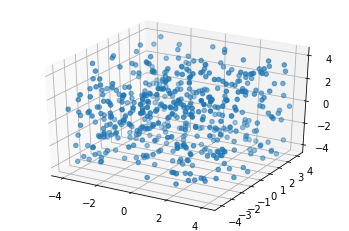

In [5]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(coords[:,0], coords[:,1], coords[:,2])

## Run the simulation

We run a simulation with the `run()` method, setting the `n_steps` paramter. The `freq` parameter will set how frequently stats will be print. Here we run for `n_steps=50000` steps, printing stats every `freq=1,000` steps. A `results` directory will by default be created where a `results.log` file will store the output. We also set `save_snaps=True` to not save a .xyz file of the box configuration every `freq=1000` steps.

In [6]:
sim.run(n_steps=50000, freq=1000, save_snaps=True)

Step: 1000 | Energy: 23519350.55022
Step: 2000 | Energy: 386166.80835
Step: 3000 | Energy: 140170.3884
Step: 4000 | Energy: 126099.53741
Step: 5000 | Energy: 214.12977
Step: 6000 | Energy: 96.88289
Step: 7000 | Energy: 44.29984
Step: 8000 | Energy: 25.77524
Step: 9000 | Energy: 14.73126
Step: 10000 | Energy: 10.04179
Step: 11000 | Energy: 5.68682
Step: 12000 | Energy: 3.63447
Step: 13000 | Energy: 1.74323
Step: 14000 | Energy: 0.4967
Step: 15000 | Energy: -0.53578
Step: 16000 | Energy: -1.44668
Step: 17000 | Energy: -1.97495
Step: 18000 | Energy: -2.58767
Step: 19000 | Energy: -3.02274
Step: 20000 | Energy: -3.50484
Step: 21000 | Energy: -3.81629
Step: 22000 | Energy: -4.04182
Step: 23000 | Energy: -4.18868
Step: 24000 | Energy: -4.37875
Step: 25000 | Energy: -4.51715
Step: 26000 | Energy: -4.64849
Step: 27000 | Energy: -4.78718
Step: 28000 | Energy: -4.89575
Step: 29000 | Energy: -4.93729
Step: 30000 | Energy: -5.02351
Step: 31000 | Energy: -5.05182
Step: 32000 | Energy: -5.16037
Step

We see a `results` folder was created and can take a quick look at the `results.log` file.

In [7]:
!ls

random_init.ipynb  results            scaling_test.ipynb


In [8]:
!head results/results.log

Starting MC!
Step    |    Energy
-------------------
1000    |    23519350.55022227
2000    |    386166.8083505889
3000    |    140170.38839691348
4000    |    126099.53741470563
5000    |    214.1297724073621
6000    |    96.88288558301865
7000    |    44.2998370984499


We can now plot the resultant energy by running `sim.plot()`.

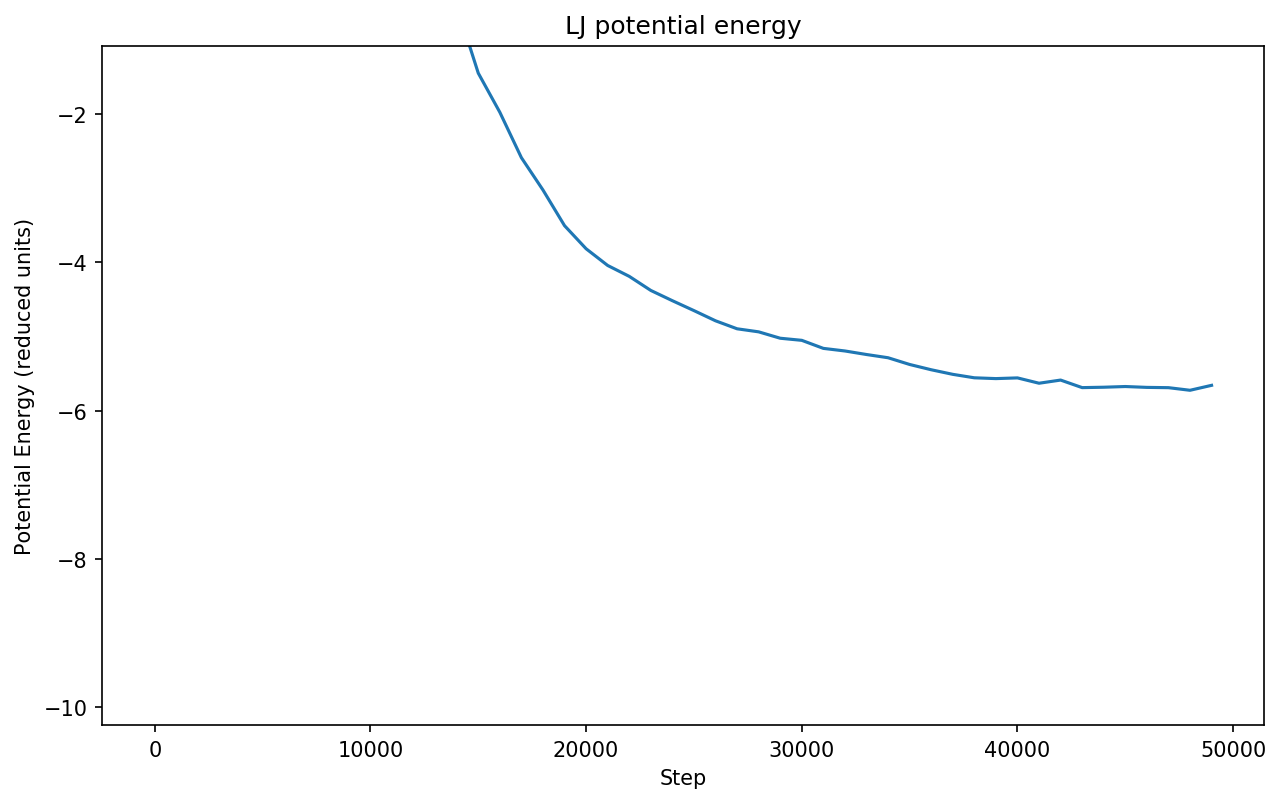

In [9]:
sim.plot()

## Verify convergence

We notice that the energy has not quite converged after 50,000 steps. We can simply continue the simulation by running another instance of the `run()` function. This will resume the simulation from the previous time step. We run this with the `save_snaps=False` option this time, which will not save future snapshots (to avoid clutter). The `results.log` file will still be updated.

In [10]:
sim.run(n_steps=50000, freq=1000, save_snaps=False)

Step: 51000 | Energy: -5.68362
Step: 52000 | Energy: -5.72128
Step: 53000 | Energy: -5.74477
Step: 54000 | Energy: -5.79626
Step: 55000 | Energy: -5.79889
Step: 56000 | Energy: -5.80891
Step: 57000 | Energy: -5.8028
Step: 58000 | Energy: -5.82454
Step: 59000 | Energy: -5.82035
Step: 60000 | Energy: -5.84677
Step: 61000 | Energy: -5.79846
Step: 62000 | Energy: -5.82777
Step: 63000 | Energy: -5.79982
Step: 64000 | Energy: -5.8619
Step: 65000 | Energy: -5.82055
Step: 66000 | Energy: -5.84929
Step: 67000 | Energy: -5.84615
Step: 68000 | Energy: -5.8809
Step: 69000 | Energy: -5.83632
Step: 70000 | Energy: -5.90252
Step: 71000 | Energy: -5.91168
Step: 72000 | Energy: -5.90387
Step: 73000 | Energy: -5.86862
Step: 74000 | Energy: -5.91332
Step: 75000 | Energy: -5.9069
Step: 76000 | Energy: -5.95078
Step: 77000 | Energy: -5.99183
Step: 78000 | Energy: -5.97237
Step: 79000 | Energy: -5.93245
Step: 80000 | Energy: -5.9577
Step: 81000 | Energy: -5.96665
Step: 82000 | Energy: -5.93564
Step: 83000 |

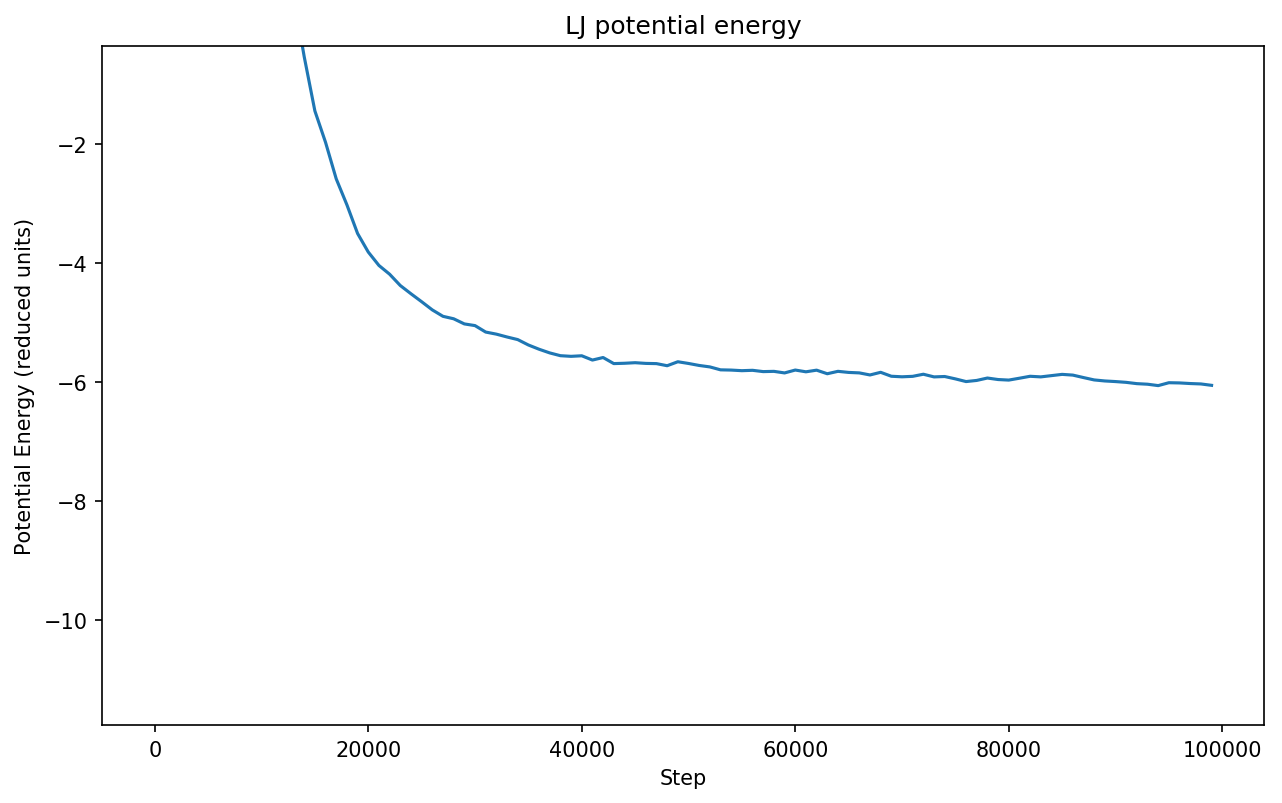

In [11]:
sim.plot()

Now we see the energy has effectively plateaued. We can extract the energy throughout the simulation using `sim.get_energy()`.

In [15]:
energy = sim.get_energy()
print(energy.shape)
print(f"Average energy over final 10,000 steps: {energy[-10000].mean().round(5)}")

(100001,)
Average energy over final 10,000 steps: -5.98387


Lastly, we can visualize the final frame using the same `sim.get_snapshot()` method as before. Notice there are markedly fewer particle overlaps compared to the initial configuration.

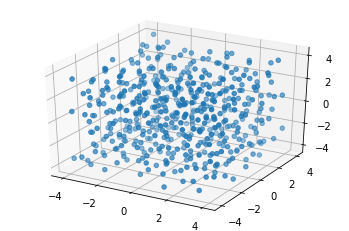

In [16]:
Geom = sim.get_snapshot()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(coords[:,0], coords[:,1], coords[:,2])